In [1]:
import spotiphy
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import importlib as imp
import spotiphy
import anndata as ad
import umap
imp.reload(spotiphy)

<module 'spotiphy' from 'C:\\Users\\zzheng92\\Desktop\\Spotiphy\\spotiphy\\__init__.py'>

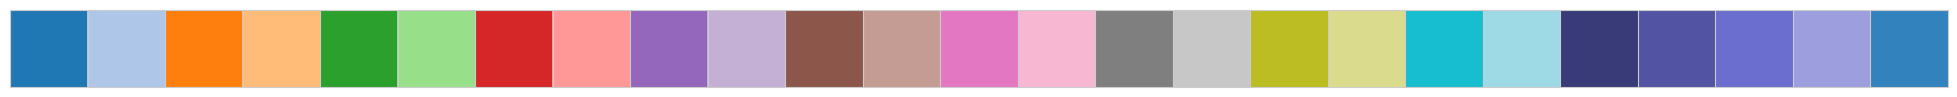

In [2]:
cmap1 = plt.get_cmap("tab20")
cmap2 = plt.get_cmap("tab20b")
cmap3 = plt.get_cmap("tab20c")
colors1 = cmap1.colors
colors2 = cmap2.colors
colors3 = cmap3.colors
contrast_palette = sns.color_palette(list(colors1) + list(colors2[:4]) + list(colors3[:1]))
del cmap1, cmap2, cmap3, colors1, colors2, colors3
sns.palplot(contrast_palette)

In [3]:
%%time
results_folder = 'results/221_43plus/'
adata_merge = sc.read_h5ad(results_folder+'adata_merge.h5ad')
key_type = 'majortype'
cell_proportion = np.load(results_folder+'proportion.npy')

CPU times: total: 2.28 s
Wall time: 4.88 s


In [6]:
sc.pp.normalize_total(adata_merge, target_sum=1e6)
sc.pp.log1p(adata_merge)
adata_merge.raw = adata_merge

scatterplots.py (392): No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


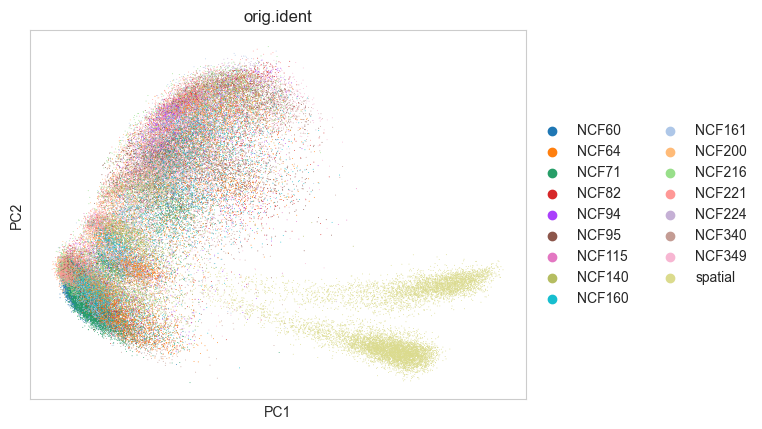

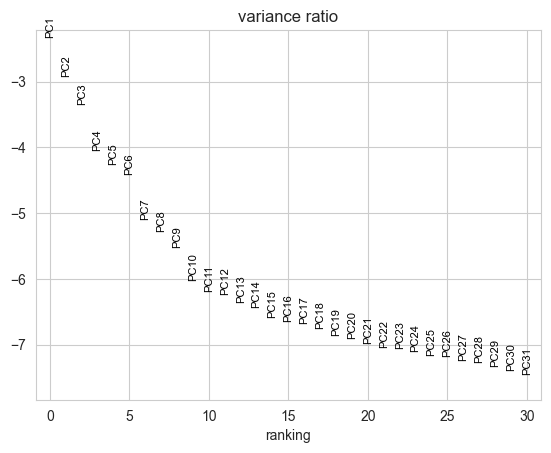

In [11]:
sc.tl.pca(adata_merge, svd_solver='arpack')
sc.pl.pca(adata_merge, color='orig.ident')
sc.pl.pca_variance_ratio(adata_merge, log=True)

scatterplots.py (392): No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


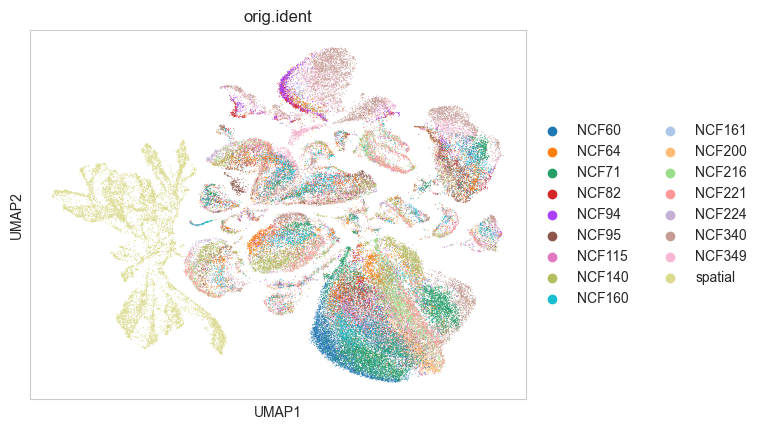

In [12]:
sc.pp.neighbors(adata_merge, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_merge)
sc.pl.umap(adata_merge, color='orig.ident')